<a href="https://colab.research.google.com/github/konrad-l/machine_learning_bootcamp/blob/main/supervised/03_classification/02_k_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Spis treści: 
1. [Import bibliotek](#a1)
2. [Wczytanie danych](#2)
2. [K-nearest Neighbour Algorithm - Algorytm K-najbliższych sąsiadów](#3)
3. [Wykres Rozproszenia](#a3)
4. [K-nearest Neighbors Classifier](#a4)
5. [Wykres granic decyzyjnych](#a5)

### <a name='a1'></a> Import bibliotek

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

### <a name='2'></a> Wczytanie danych

In [2]:
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

print(f'{data[:5]}\n')
print(f'{target[:5]}\n')

print(f'rozmiar data: {data.shape}')
print(f'rozmiar target: {target.shape}')

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

[0 0 0 0 0]

rozmiar data: (150, 4)
rozmiar target: (150,)


In [4]:
all_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# oryginalny kod z kursu
# df = pd.DataFrame(np.c_[data, target], columns=all_data['feature_names']+['class'])
# df.head()

In [6]:
# zmiana kodu do wygenerowania df
# konieczne jest poprawne ustawienie kolumny target (wszystkie dane w jednej kolumnie)
target = target.reshape(-1,1)

In [7]:
df = pd.DataFrame(np.concatenate((data, target), axis=1), columns=all_data['feature_names']+['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [10]:
df['target'].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

### <a name='a3'></a> Wykres Rozproszenia

In [11]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

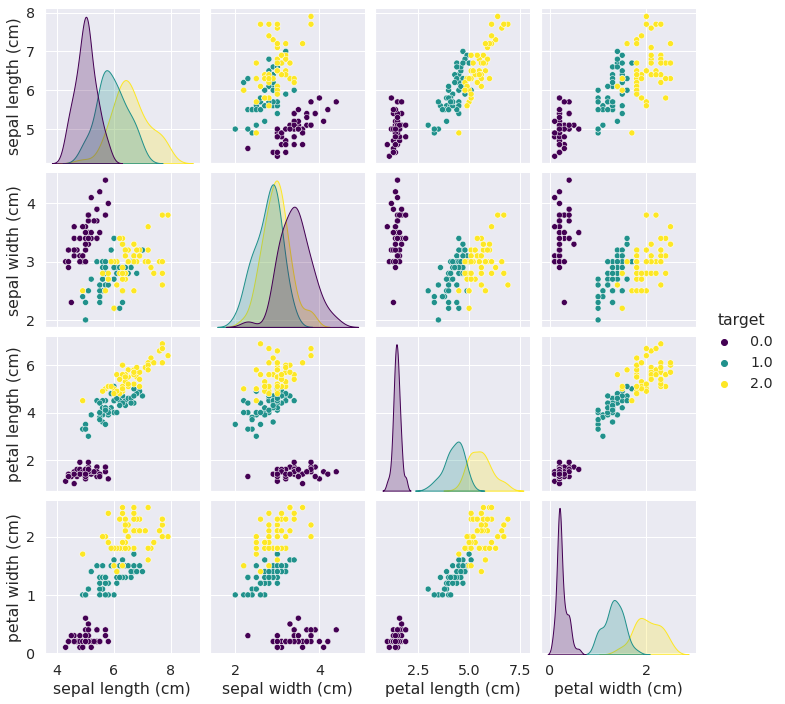

In [12]:
_= sns.pairplot(df, vars=all_data['feature_names'], hue='target', palette='viridis')
# hue - podzieli na tyle kolorów ile jest targetów

In [13]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [14]:
# petal length (cm) i petal width (cm) są mocno powiązane z target
# dla utrudnienia zadania zostały usunięte z tabeli
# na wykresie pairplot widać, że te zmienne umożliwiłyby poprawne przewidywanie wyników

data = data[:, :2]

print(f'rozmiar data: {data.shape}')
print(f'rozmiar target: {target.shape}')

rozmiar data: (150, 2)
rozmiar target: (150, 1)


Text(0, 0.5, 'cecha_2: sepal_width')

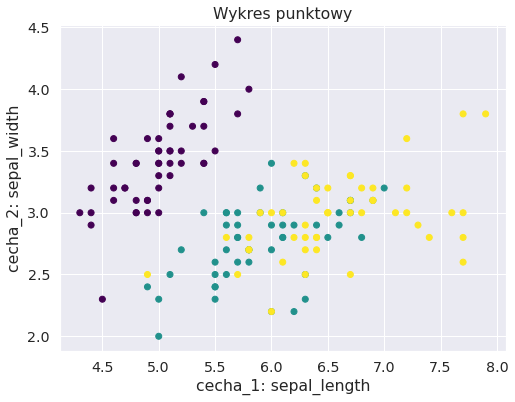

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis')
plt.title('Wykres punktowy')
plt.xlabel('cecha_1: sepal_length')
plt.ylabel('cecha_2: sepal_width')

In [16]:
# target = target.reshape(-1,1) - nie trzeba już jej ustawiać, tzn w jedną kolumnę
df = pd.DataFrame(np.concatenate((data, target), axis=1), columns=['sepal_length', 'sepal_width', 'target'])
df.head()

,sepal_length,sepal_width,target
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0


In [17]:
# wyświetlanie za pomocą biblioteki plotly
px.scatter(df, x='sepal_length', y='sepal_width', color='target', width=800)

### <a name='a4'></a> K-nearest Neighbour Algorithm - Algorytm K-najbliższych sąsiadów

Podstawą działania algorytmu jest:
* znalezienie z góry określonej liczby próbek treningowych znajdujących się najbliżej naszej obserwacji 
* przewidzenie na ich podstawie etykiety

Liczba sąsiadów jest określana przez użytkownika. Odległości zwykle kalkuluje sie przy pomocy metryki euklidesowej. 

In [18]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(data, target)

# tutaj nie podzieliliśmy na model treningowy i testowy (fitowanie na całym zbiorze)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier()

### <a name='a5'></a> Wykres granic decyzyjnych

Text(0.5, 1.0, '3-class classification k=5')

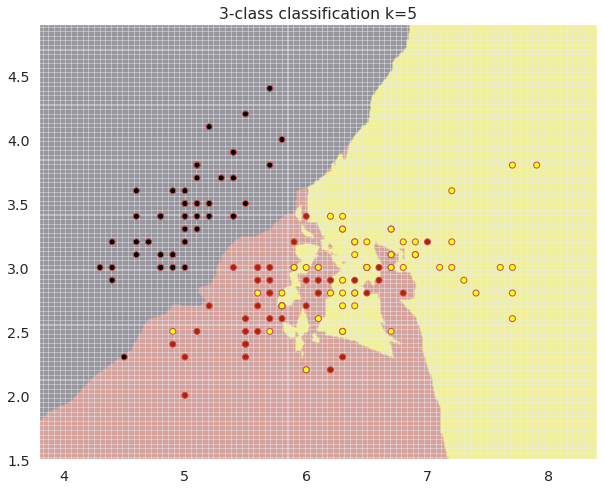

In [20]:
x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('3-class classification k=5')

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



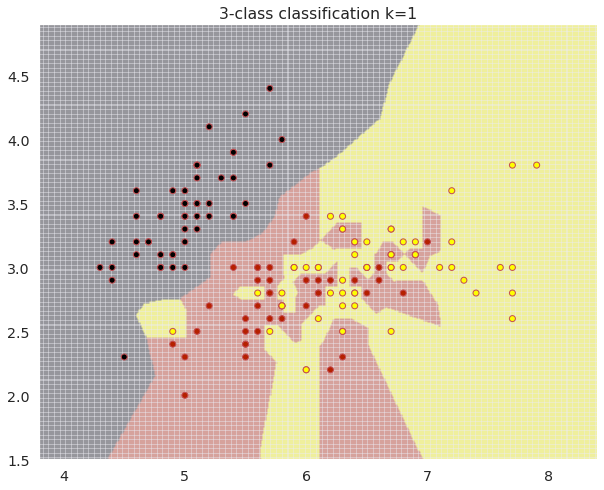

In [22]:
def plot_decision_boundries(n_neighbors=1):

  classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
  classifier.fit(data, target)

  x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
  y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
  mesh = np.c_[xx.ravel(), yy.ravel()]
  Z = classifier.predict(mesh)
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(10, 8))
  plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
  plt.scatter(data[:, 0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title(f'3-class classification k={n_neighbors}')

plot_decision_boundries()

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



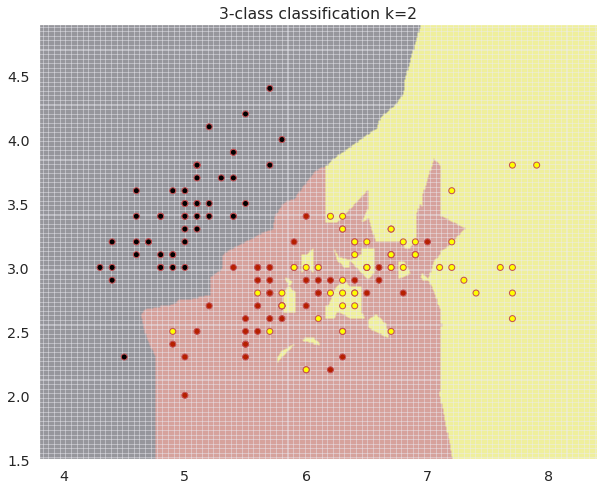

In [23]:
plot_decision_boundries(2)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



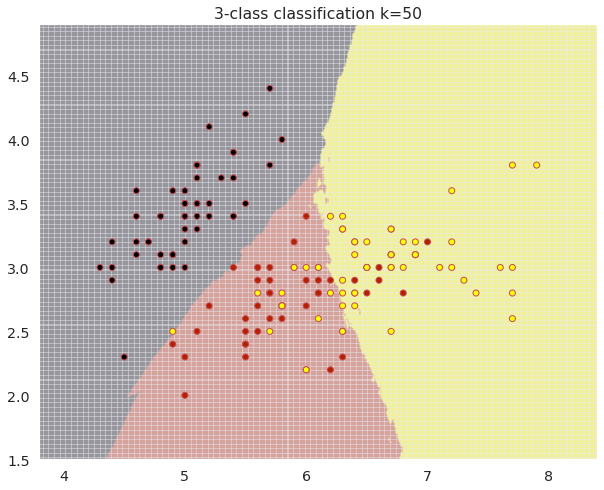

In [24]:
plot_decision_boundries(50)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/n

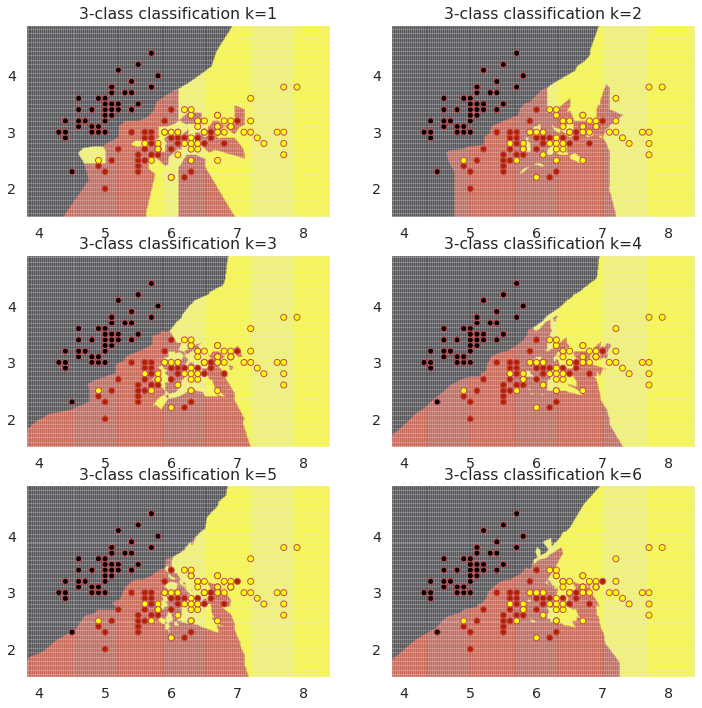

In [31]:
plt.figure(figsize=(12, 12))

for i in range(1, 7):
  plt.subplot(3, 2, i)
  
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(data, target)

  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
  mesh = np.c_[xx.ravel(), yy.ravel()]
  Z = clf.predict(mesh)
  Z = Z.reshape(xx.shape)

  plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
  plt.scatter(data[:, 0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title(f'3-class classification k={i}')